# NBA 2022/2023 Regular Season Data Visualization


In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


%matplotlib inline

 



In [18]:
#Setting the player names as the index columns
# Loading in my data

nba = pd.read_csv('2023_nba_player_stats.csv', 
                  index_col='Player')

In [19]:
#Displaying all of the columns
pd.set_option('display.max_columns', None)

In [20]:

font = {'family' : 'Arial', 
        'weight' : 'normal', 
        'size' : 17, 
        'color' : '#818696'}

### Adding more columns


In [21]:

#Adding 'per game' statistics

nba['PPG'] = (nba['PTS'] / nba['GP']).round(1)
nba['RPG'] = (nba['REB'] / nba['GP']).round(1)
nba['APG'] = (nba['AST'] / nba['GP']).round(1)
nba['BPG'] = (nba['BLK'] / nba['GP']).round(1)
nba['SPG'] = (nba['STL'] / nba['GP']).round(1)
nba['MPG'] = (nba['Min'] / nba['GP']).round(1)
nba['TPG'] = (nba['TOV'] / nba['GP']).round(1)
nba['ORPG'] = (nba['OREB'] / nba['GP']).round(1)
nba['DRPG'] = (nba['DREB'] / nba['GP']).round(1)
nba['3PMPG'] = (nba['3PM'] / nba['GP']).round(1)
nba['3PAPG'] = (nba['3PA'] / nba['GP']).round(1)


In [22]:
nba['AST/TOV'] = (nba['APG'] / nba['TPG'])
nba[(nba['AST/TOV'] == np.inf)]
nba['AST/TOV'].replace(np.inf, 0, inplace=True)

In [23]:
#Newly added columns are at the end and we don't want that.

nba.head(0)

,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,PPG,RPG,APG,BPG,SPG,MPG,TPG,ORPG,DRPG,3PMPG,3PAPG,AST/TOV
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [24]:
#Putting the new columns in preffered positions
def preffered_positions():
    nba.insert(9, 'PPG', nba.pop('PPG'))
    nba.insert(22, 'RPG', nba.pop('RPG'))
    nba.insert(18, 'ORPG', nba.pop('ORPG'))
    nba.insert(19, 'DRPG', nba.pop('DRPG'))
    nba.insert(24, 'APG', nba.pop('APG'))
    nba.insert(31, 'BPG', nba.pop('BPG'))
    nba.insert(29, 'SPG', nba.pop('SPG'))
    nba.insert(7, 'MPG', nba.pop('MPG'))
    nba.insert(26, 'TPG', nba.pop('TPG'))
    nba.insert(15, '3PMPG', nba.pop('3PMPG'))
    nba.insert(16, '3PAPG', nba.pop('3PAPG'))
    nba.insert(27, 'AST/TOV', nba.pop('AST/TOV'))
    


In [25]:
preffered_positions()

In [26]:
nba.head(0)

,POS,Team,Age,GP,W,L,Min,MPG,PTS,FGM,PPG,FGA,FG%,3PM,3PA,3PMPG,3PAPG,3P%,FTM,FTA,FT%,ORPG,DRPG,OREB,DREB,REB,AST,AST/TOV,APG,TPG,RPG,TOV,STL,BLK,SPG,PF,FP,BPG,DD2,TD3,+/-
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [27]:
#Removing unwanted columns

nba.drop('FP', axis=1, inplace=True)

In [28]:
#Getting the index position for each column
for col in nba.columns:
    print(f"{col}: {nba.columns.get_loc(col)}")


POS: 0
Team: 1
Age: 2
GP: 3
W: 4
L: 5
Min: 6
MPG: 7
PTS: 8
FGM: 9
PPG: 10
FGA: 11
FG%: 12
3PM: 13
3PA: 14
3PMPG: 15
3PAPG: 16
3P%: 17
FTM: 18
FTA: 19
FT%: 20
ORPG: 21
DRPG: 22
OREB: 23
DREB: 24
REB: 25
AST: 26
AST/TOV: 27
APG: 28
TPG: 29
RPG: 30
TOV: 31
STL: 32
BLK: 33
SPG: 34
PF: 35
BPG: 36
DD2: 37
TD3: 38
+/-: 39


In [29]:
#Checking for any null values 

nba[nba.isna().any(axis=1)]

,POS,Team,Age,GP,W,L,Min,MPG,PTS,FGM,PPG,FGA,FG%,3PM,3PA,3PMPG,3PAPG,3P%,FTM,FTA,FT%,ORPG,DRPG,OREB,DREB,REB,AST,AST/TOV,APG,TPG,RPG,TOV,STL,BLK,SPG,PF,BPG,DD2,TD3,+/-
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tyler Dorsey,G,DAL,27.0,3.0,2.0,1.0,8.3,2.8,9.0,4.0,3.0,5.0,80.0,1.0,2.0,0.3,0.7,50.0,0.0,0.0,0.0,0.3,0.3,1.0,1.0,2.0,0.0,NaN,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Chance Comanche,C,POR,27.0,1.0,0.0,1.0,20.8,20.8,7.0,3.0,7.0,5.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,25.0,2.0,1.0,2.0,1.0,3.0,0.0,NaN,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-29.0
Marko Simonovic,C,CHI,23.0,7.0,3.0,4.0,19.6,2.8,6.0,2.0,0.9,7.0,28.6,1.0,4.0,0.1,0.6,25.0,1.0,2.0,50.0,0.1,0.1,1.0,1.0,2.0,0.0,NaN,0.0,0.0,0.3,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,15.0
Malcolm Hill,F,CHI,27.0,5.0,4.0,1.0,9.2,1.8,5.0,2.0,1.0,4.0,50.0,1.0,3.0,0.2,0.6,33.3,0.0,0.0,0.0,0.0,0.6,0.0,3.0,3.0,0.0,NaN,0.0,0.0,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
Braxton Key,G,DET,26.0,3.0,0.0,3.0,9.1,3.0,4.0,1.0,1.3,1.0,100.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100.0,0.0,0.3,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
Dereon Seabron,G,NOP,22.0,5.0,2.0,3.0,11.6,2.3,4.0,2.0,0.8,5.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0
Donovan Williams,G,ATL,21.0,2.0,1.0,1.0,4.3,2.2,4.0,2.0,2.0,5.0,40.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Trevor Keels,G,NYK,19.0,3.0,3.0,0.0,8.0,2.7,3.0,1.0,1.0,4.0,25.0,1.0,4.0,0.3,1.3,25.0,0.0,0.0,0.0,0.0,0.7,0.0,2.0,2.0,0.0,NaN,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.0
Stanley Umude,G,DET,24.0,1.0,0.0,1.0,2.1,2.1,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0


Adding positions that were missng for certain players

In [30]:
#Getting their positions based on search results
#Source:  Bing

nba.at['Sterling Brown', 'POS'] = 'SG'
nba.at['Alondes Williams', 'POS'] = 'PG'
nba.at['Deonte Burton', 'POS'] = 'SF'
nba.at['Frank Jackson', 'POS'] = 'SG'
nba.at['Michael Foster Jr.', 'POS'] = 'PF'


In [31]:
#Type conversion for less memory usage

convert = ['GP',
           'Age',
           'W',
            'L',
            'PTS',
            'FGM',
            'FGA',
            '3PM',
            '3PA',
            'FTM',
            'FTA',
            'OREB',
            'DREB',
            'REB',
            'AST',
            'TOV',
            'STL',
            'BLK',
            'DD2',
            'TD3',
            '+/-'
]

nba[convert] = nba[convert].astype('int16')

In [32]:
preffered_positions()

In [33]:
nba.head(0)

,POS,Team,Age,GP,W,L,Min,MPG,PTS,PPG,FGM,FGA,FG%,3PM,3PA,3PMPG,3PAPG,3P%,ORPG,DRPG,FTM,FTA,FT%,RPG,APG,OREB,TPG,AST/TOV,DREB,REB,AST,SPG,BPG,TOV,STL,BLK,PF,DD2,TD3,+/-
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Basic Plots

In [34]:
plt.style.use('Solarize_Light2')

##### Age distribution of players in the dataset using histogram.

In [35]:
age_distribution = nba['Age'].reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


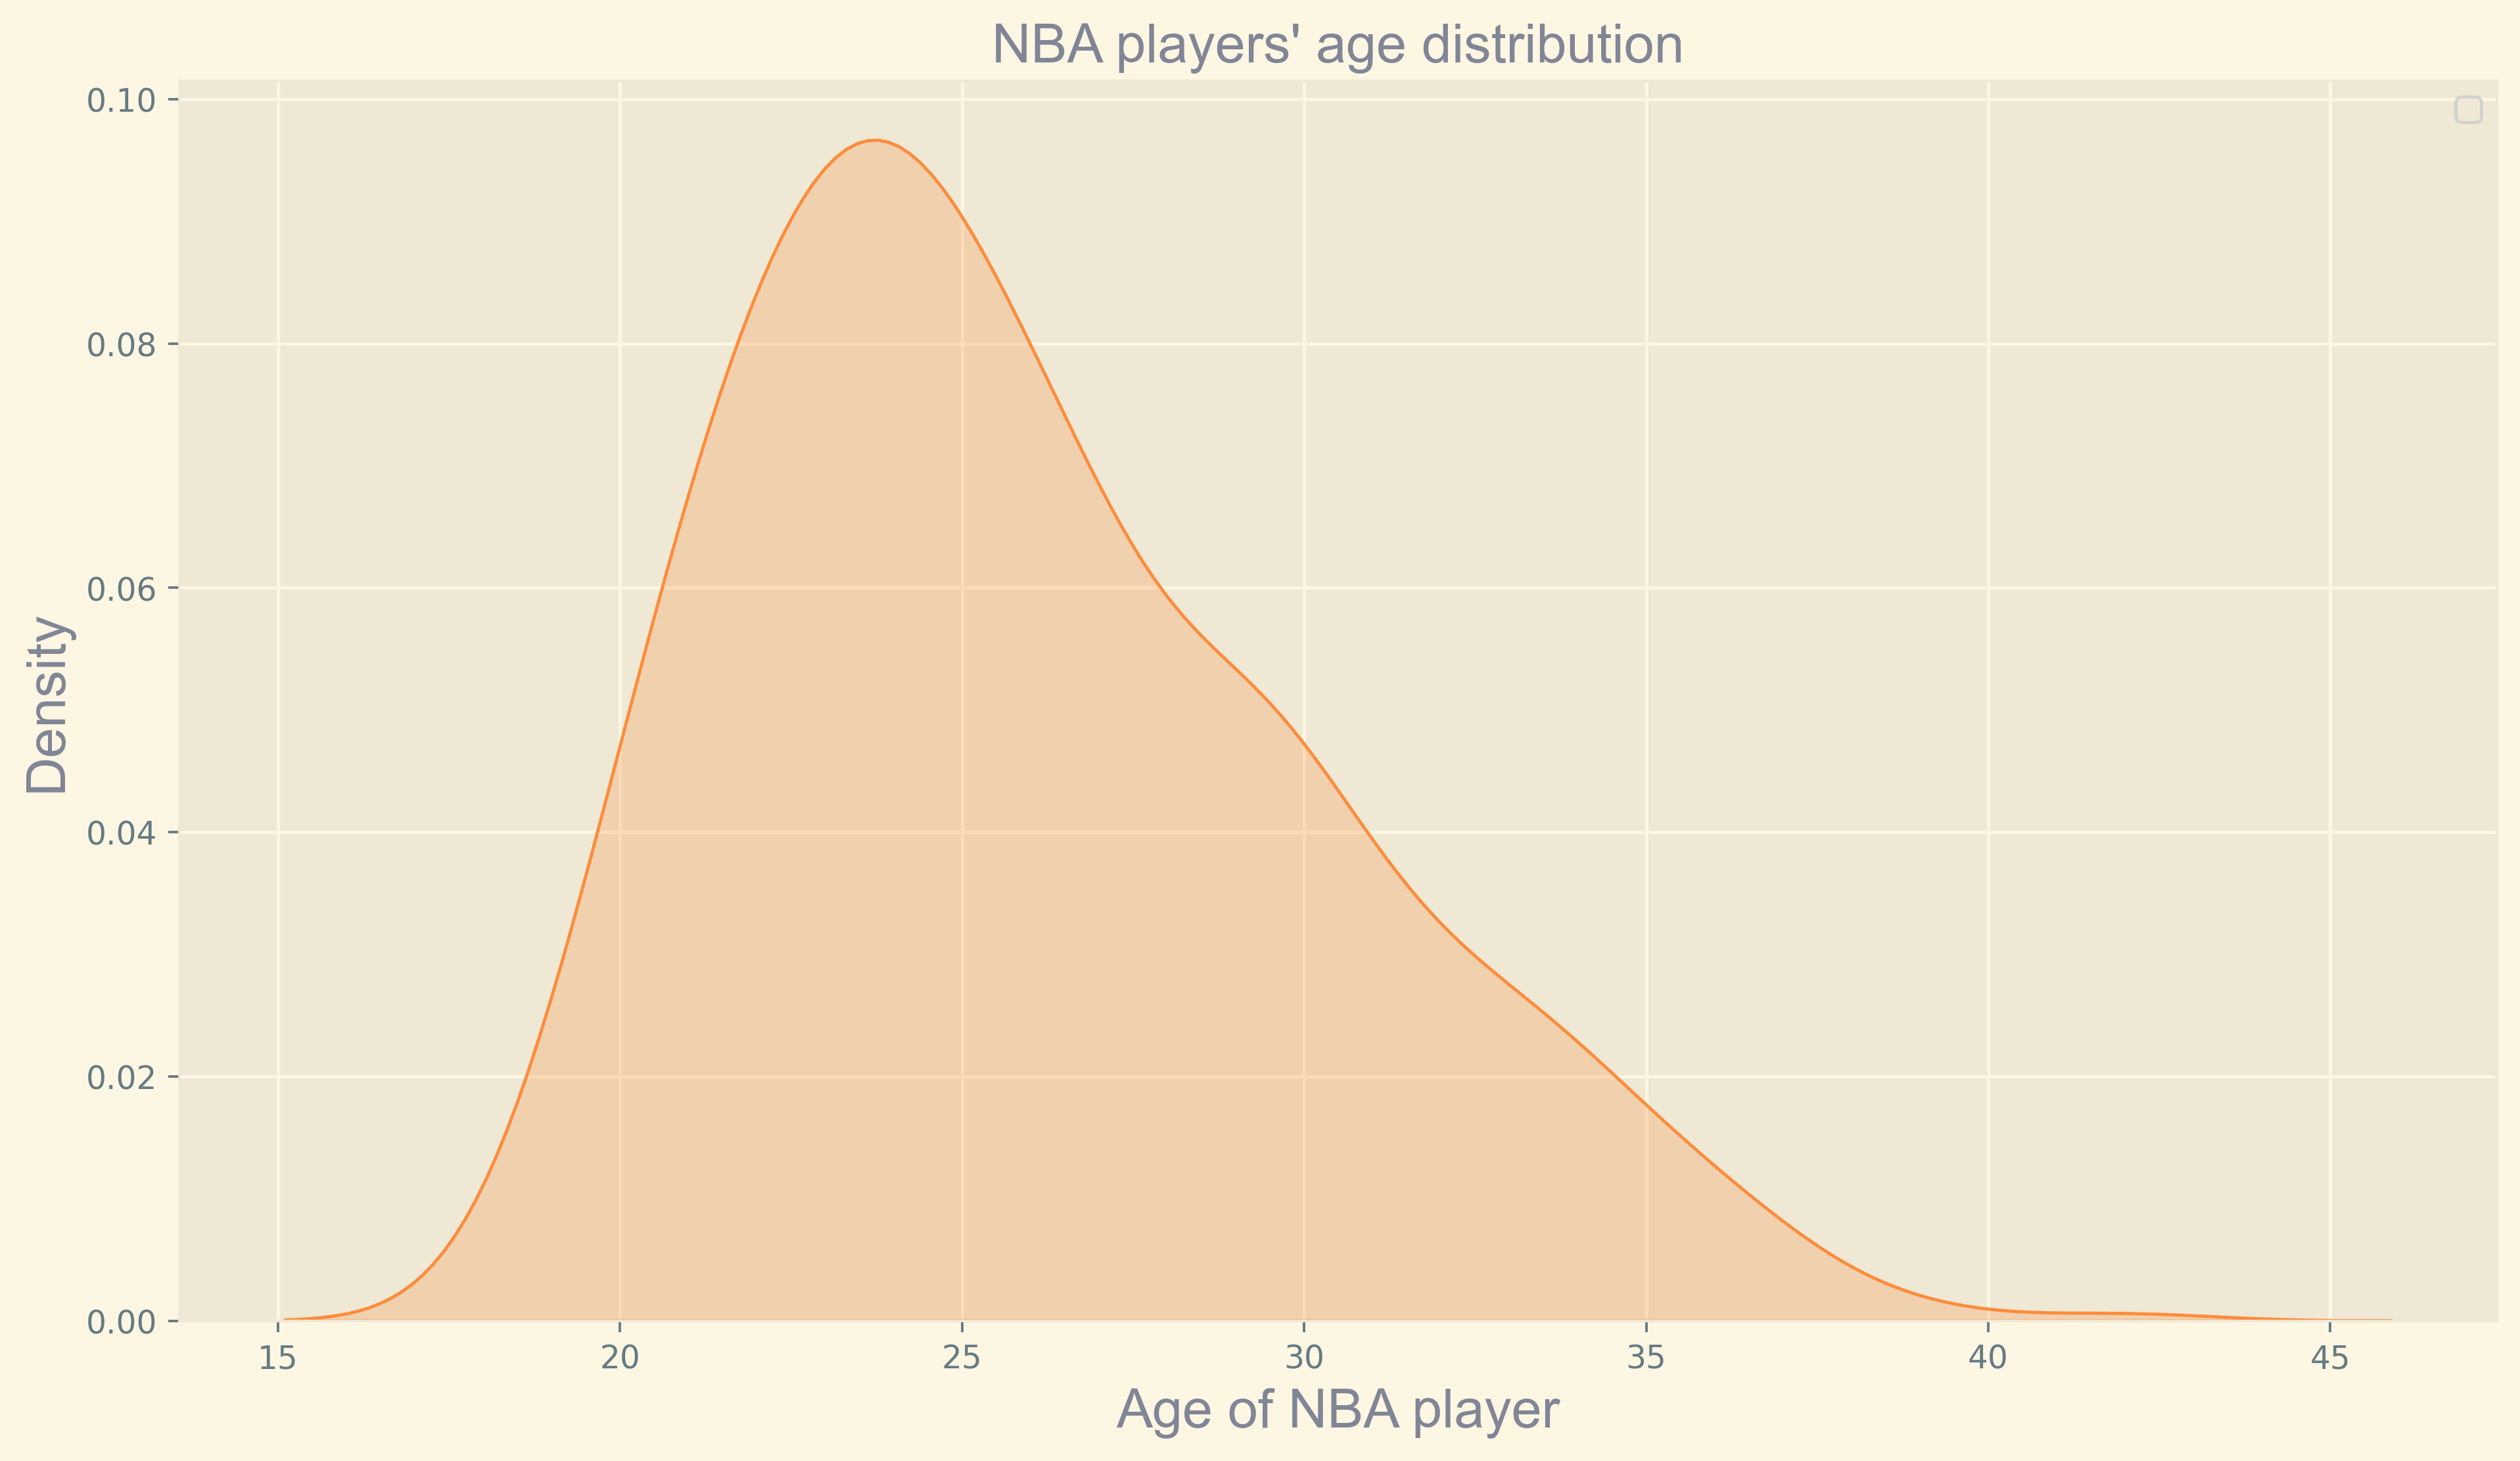

In [36]:
plt.figure(figsize=(13, 7), dpi=350)

sns.kdeplot(age_distribution, fill=True, bw_method='silverman', color='yellow',  palette='Oranges')

plt.title("NBA players' age distribution", fontdict=font)
plt.xlabel('Age of NBA player', color='#818696', fontdict=font)                   
plt.ylabel('Density', color='#818696', fontdict=font)
plt.legend(labelcolor='black')

#####  Relationship between average points per game (PPG) and average minutes per game (MPG) for each position (PG, SG, SF, PF, C)

In [37]:
avg_ppg = nba.groupby('POS')['PTS'].mean().sort_values().iloc[2:]
avg_ppg.rename(index={'C': 'Center', 
                      'PF': 'Power Forward', 
                      'SF': 'Small Forward', 
                      'SG': 'Shooting Guard', 
                      'PG': 'Point Guard'}, inplace=True)

avg_ppg = avg_ppg.reset_index()

avg_mpg = nba.groupby('POS')['Min'].mean().sort_values().iloc[2:]
avg_mpg.rename(index={'C': 'Center', 
                      'PF': 'Power Forward', 
                      'SF': 'Small Forward', 
                      'SG': 'Shooting Guard', 
                      'PG': 'Point Guard'}, inplace=True)
avg_mpg = avg_mpg.reset_index()

positions = ['Center', 'Power Forward', 'Small Forward', 'Shooting Guard', 'Point Guard']

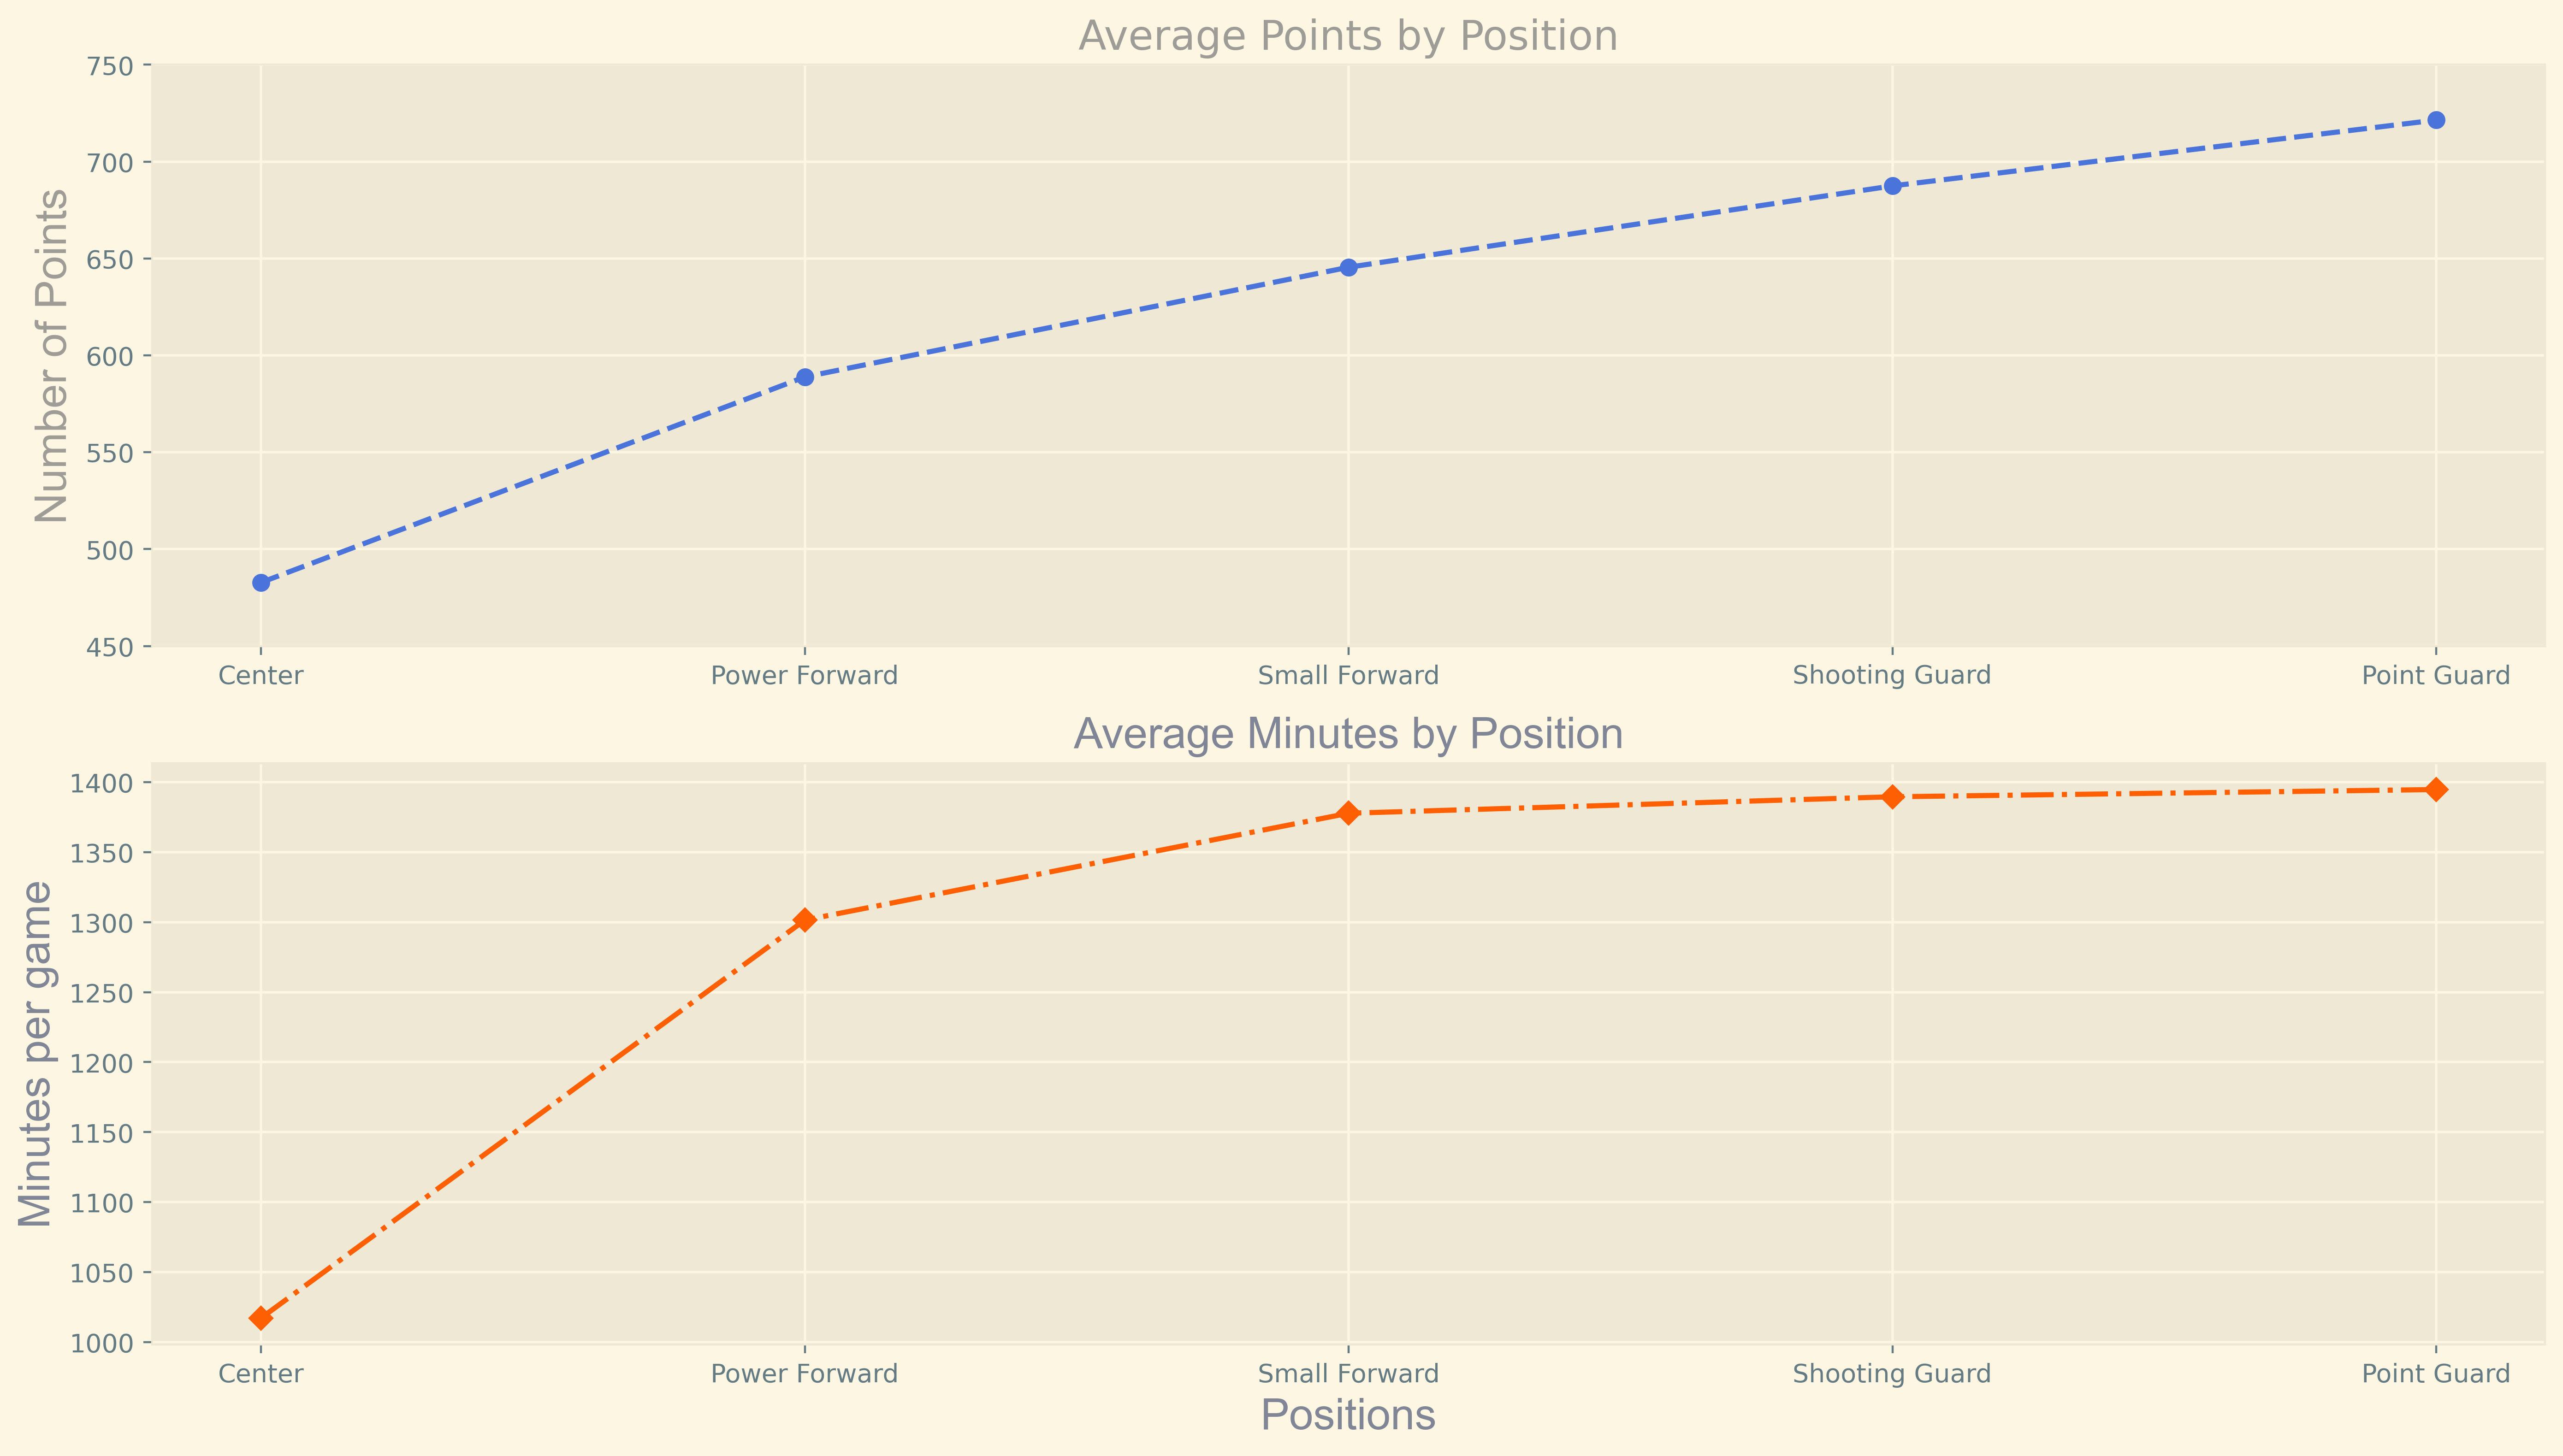

In [38]:
fig, ax = plt.subplots(2, 1, dpi=400, figsize=(14, 8))

ax[0].plot(avg_ppg['POS'],
        avg_ppg['PTS'],
        linestyle='--', 
        marker='o',
        color='#4b74db',
        ) 

ax[0].set_xticks(avg_mpg['POS'])
ax[0].set_yticks(range(450, 800, 50))
ax[0].set_title("Average Points by Position", color='#9e9c96')
#ax[0].set_xlabel('Positions', fontdict=font, color='#9e9c96')
ax[0].set_ylabel('Number of Points', fontdict=font, color='#9e9c96')


ax[1].plot(positions,
        avg_mpg['Min'],
        linestyle='-.', 
        marker='D',
        color='#ff5f03',
        ) 

ax[1].set_xticks(avg_mpg['POS'])
ax[1].set_title("Average Minutes by Position", fontdict=font)
ax[1].set_xlabel('Positions', fontdict=font)
ax[1].set_ylabel('Minutes per game', fontdict=font)


plt.tight_layout()
plt.show()

##### Total number of blocks (BLK)

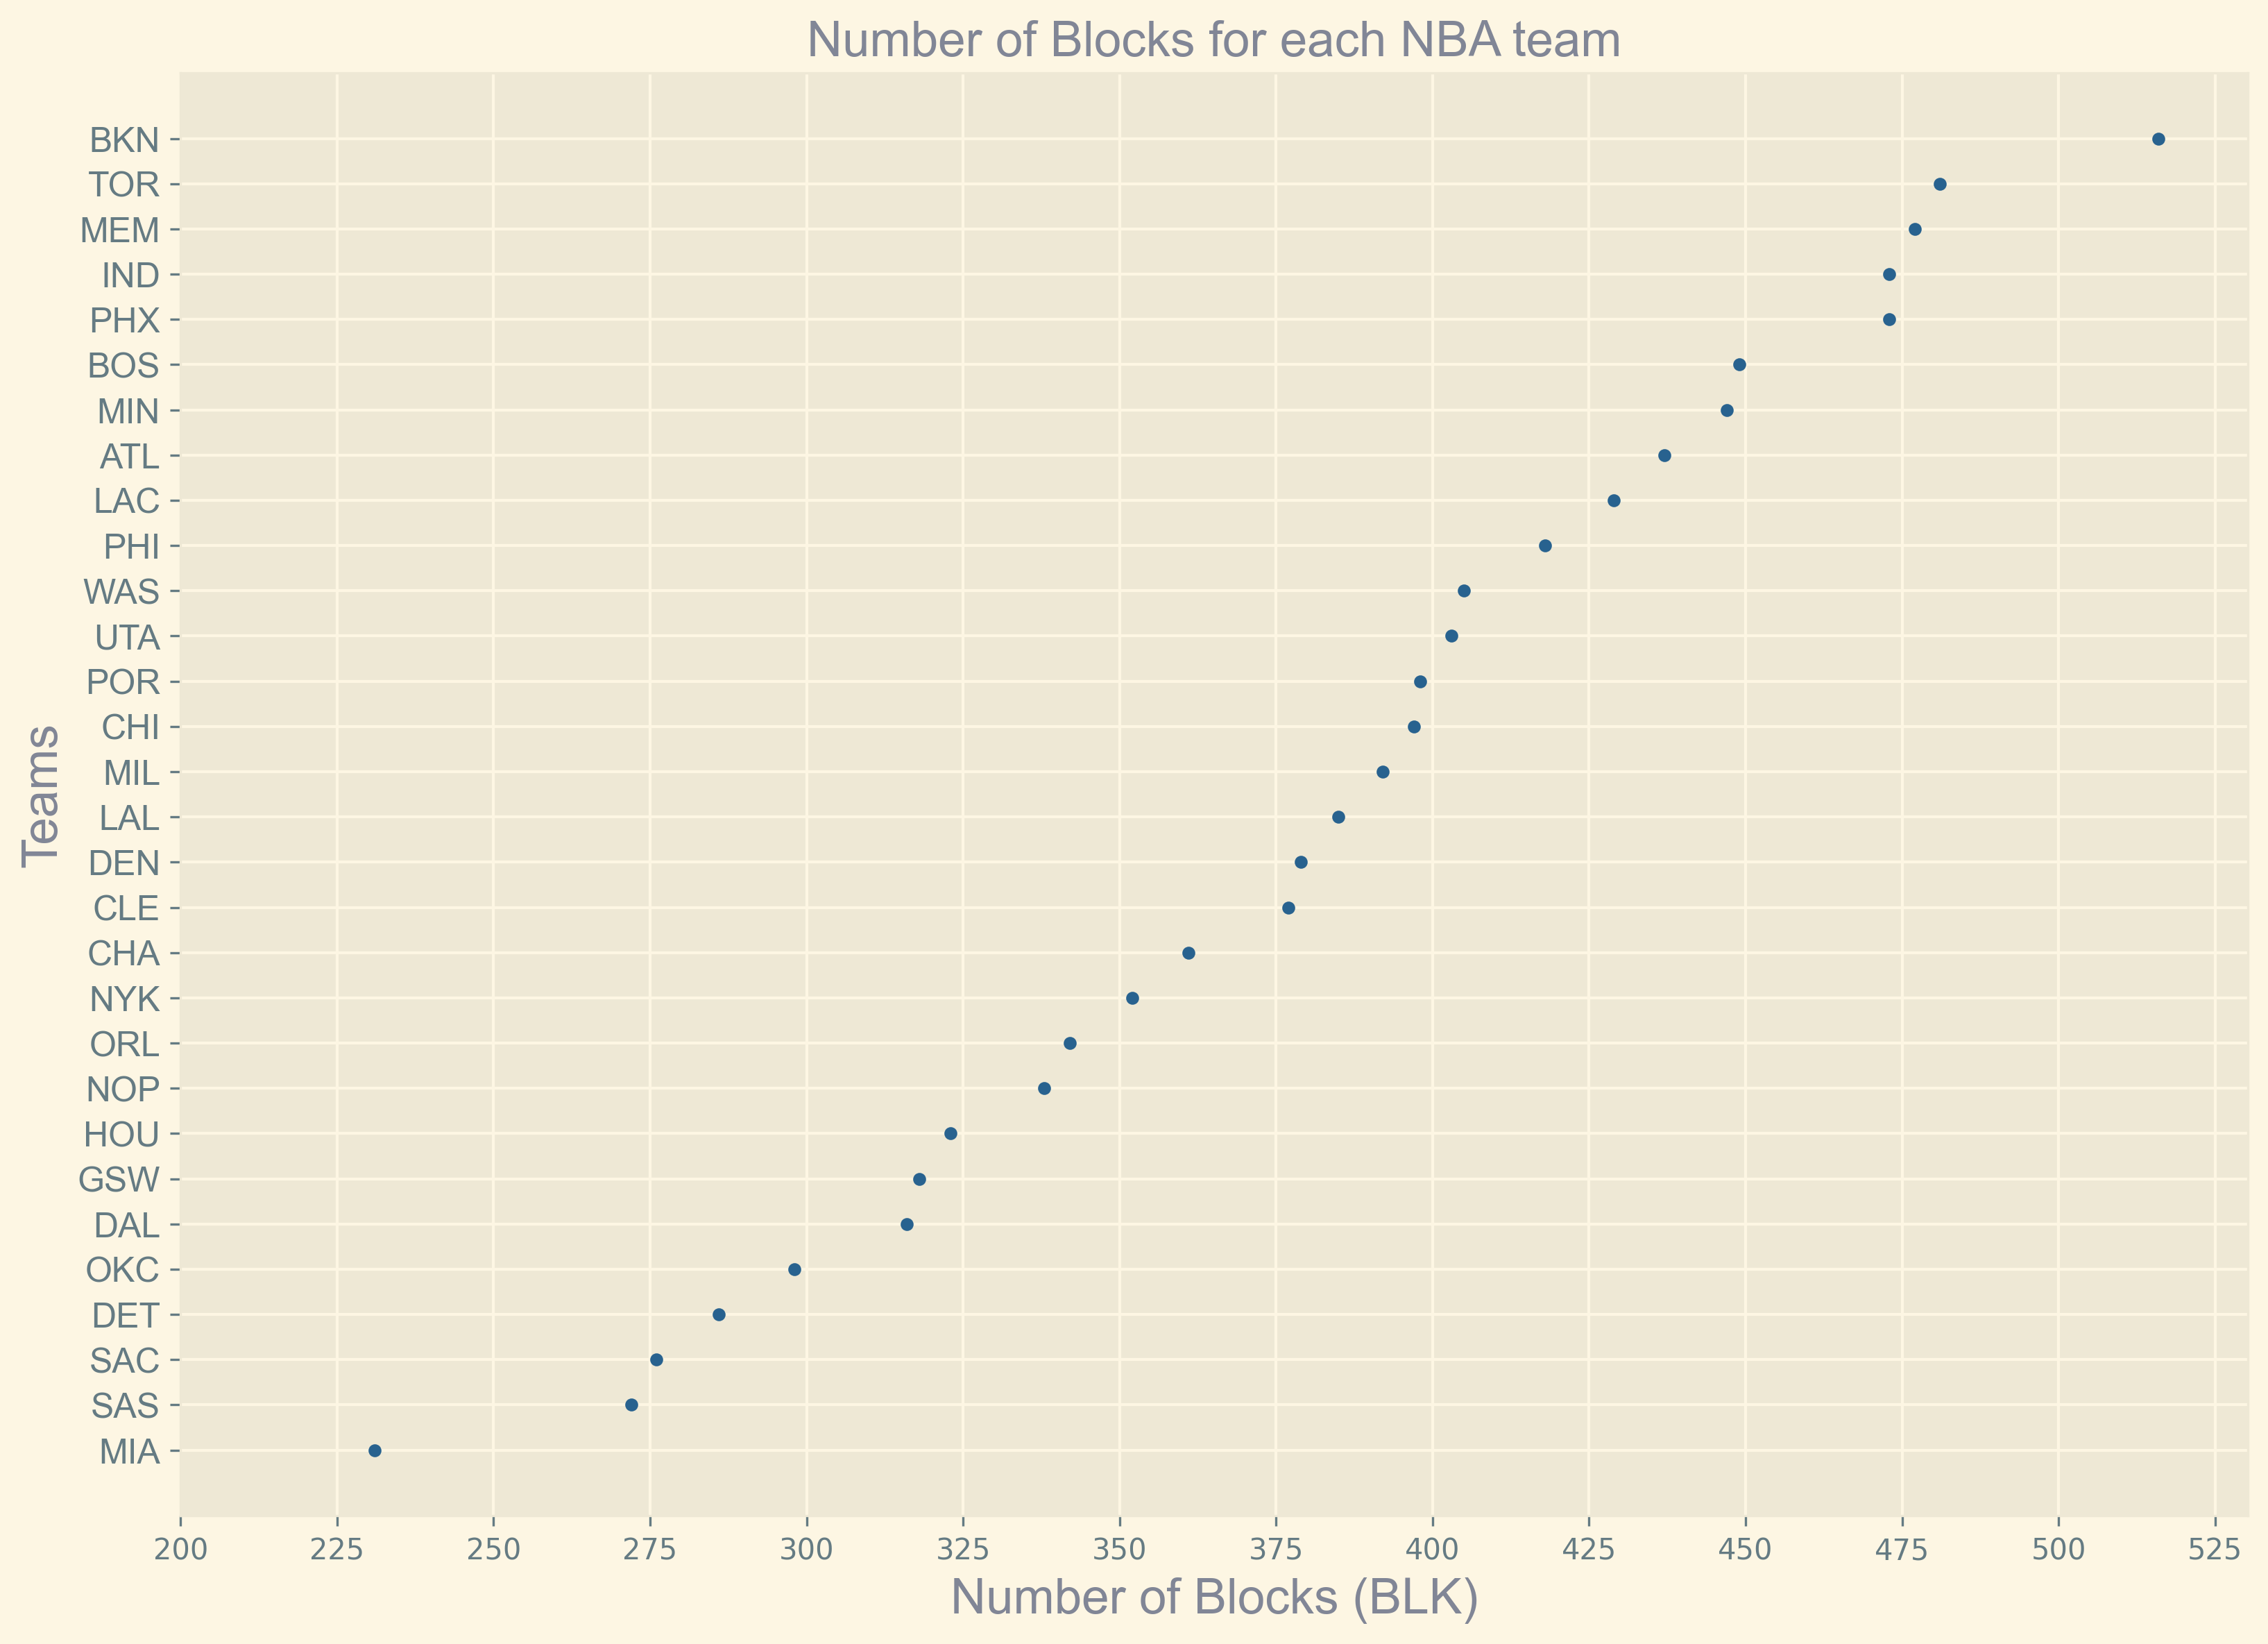

In [46]:
blk_total_by_team = nba.groupby('Team').sum()['BLK'].sort_values().reset_index()

plt.figure(figsize=(11, 8), dpi=300)
plt.scatter(x=blk_total_by_team['BLK'], 
            y=blk_total_by_team['Team'], 
            s=12, 
            c='#28628f'
            )

plt.title('Number of Blocks for each NBA team', fontdict=font)
plt.xlabel('Number of Blocks (BLK)', fontdict=font)
plt.ylabel('Teams', fontdict=font)

plt.xticks(np.arange(200, 550, 25))
plt.yticks(blk_total_by_team['Team'], fontproperties='Arial', fontsize=12)
plt.tight_layout()
plt.show()


##### The relationship between a player's age and their points per game (PTS) using a scatter plot.

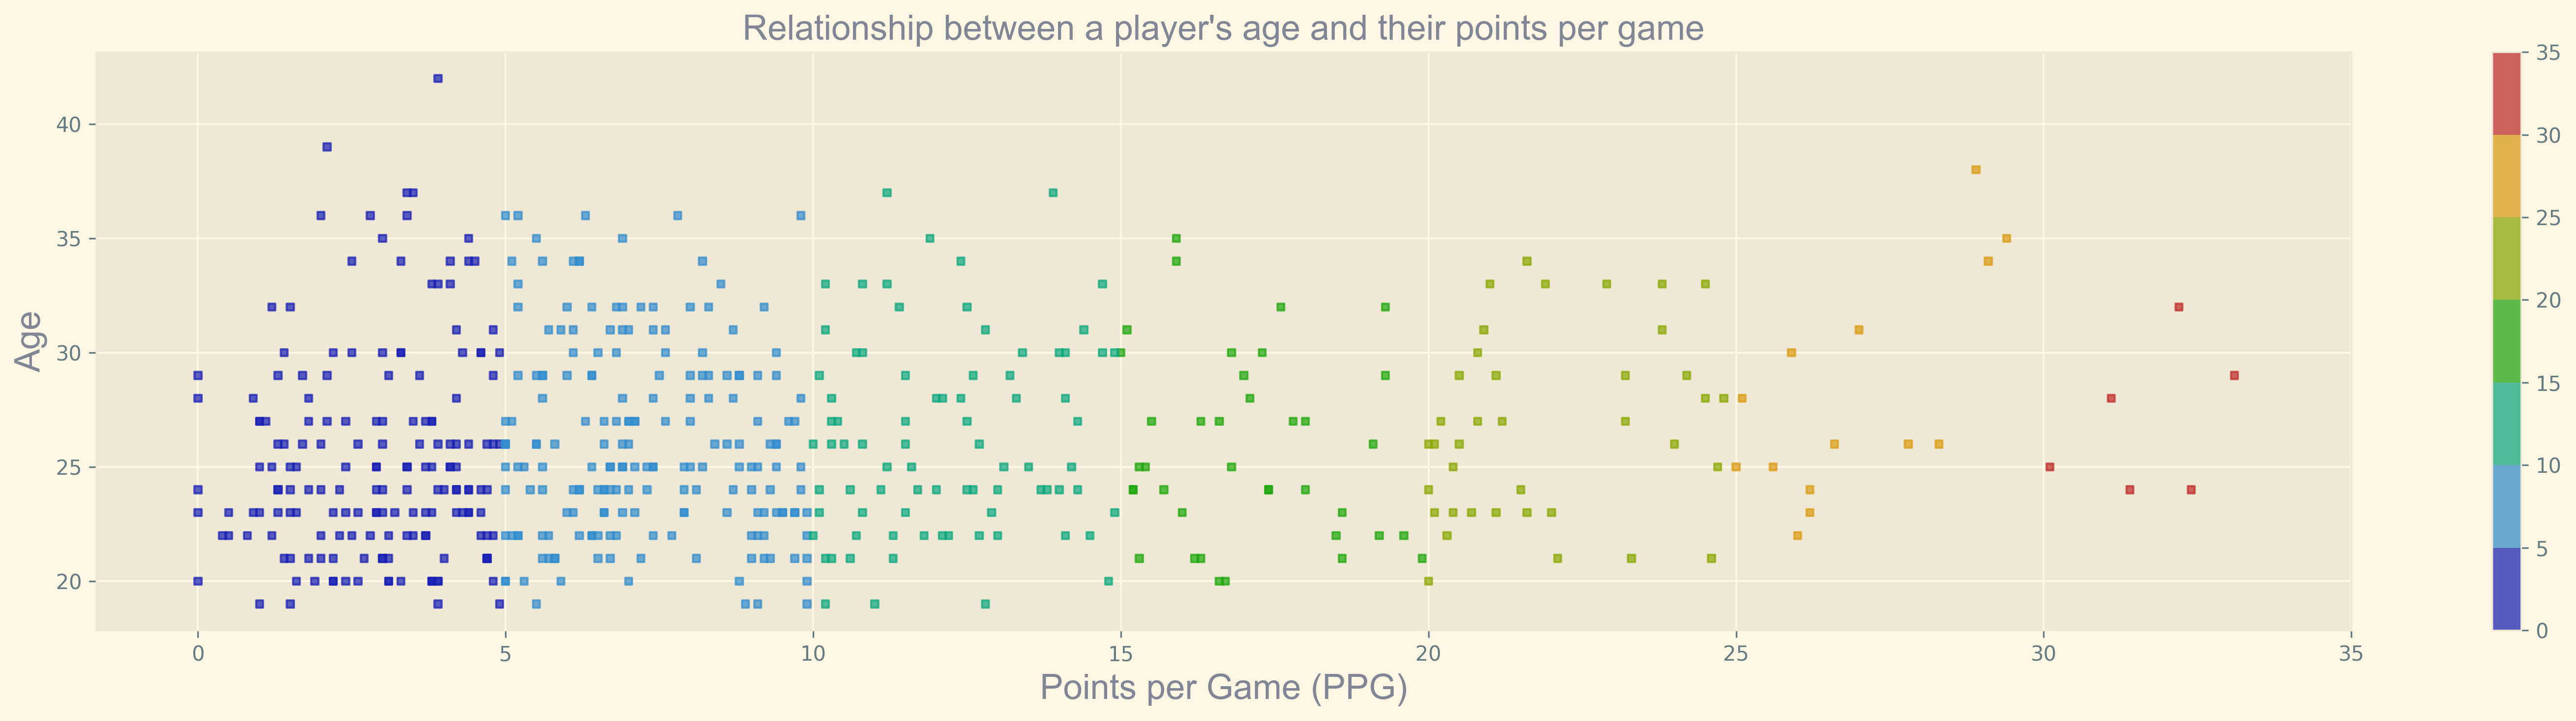

In [40]:
age_points_scatter = nba[['Age', 'PPG']]

x = age_points_scatter['PPG']
y = age_points_scatter['Age']

colors = ListedColormap(['#1920b5', '#328dcf', '#0ca87f', '#1ea80c', '#8aa803', '#db9b12', '#bf2a2a'])

plt.figure(figsize=(20, 5), dpi=300)
scatter_plot =plt.scatter(
              x=x,
              y=y,
              s=12,
              c=x, 
              marker=',', 
              alpha=0.7, 
              cmap=colors, 
              vmax=np.max(35), 
              vmin=np.min(0)
              )



plt.title("Relationship between a player's age and their points per game", fontdict=font)
plt.xlabel("Points per Game (PPG)", fontdict=font)
plt.ylabel("Age", fontdict=font)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35])
colourbar = plt.colorbar()
#colourbar.set_label("Points per Game (PPG)", fontdict=font)
plt.tight_layout()
plt.show()



##### Average plus/minus (+/-) value for each team 

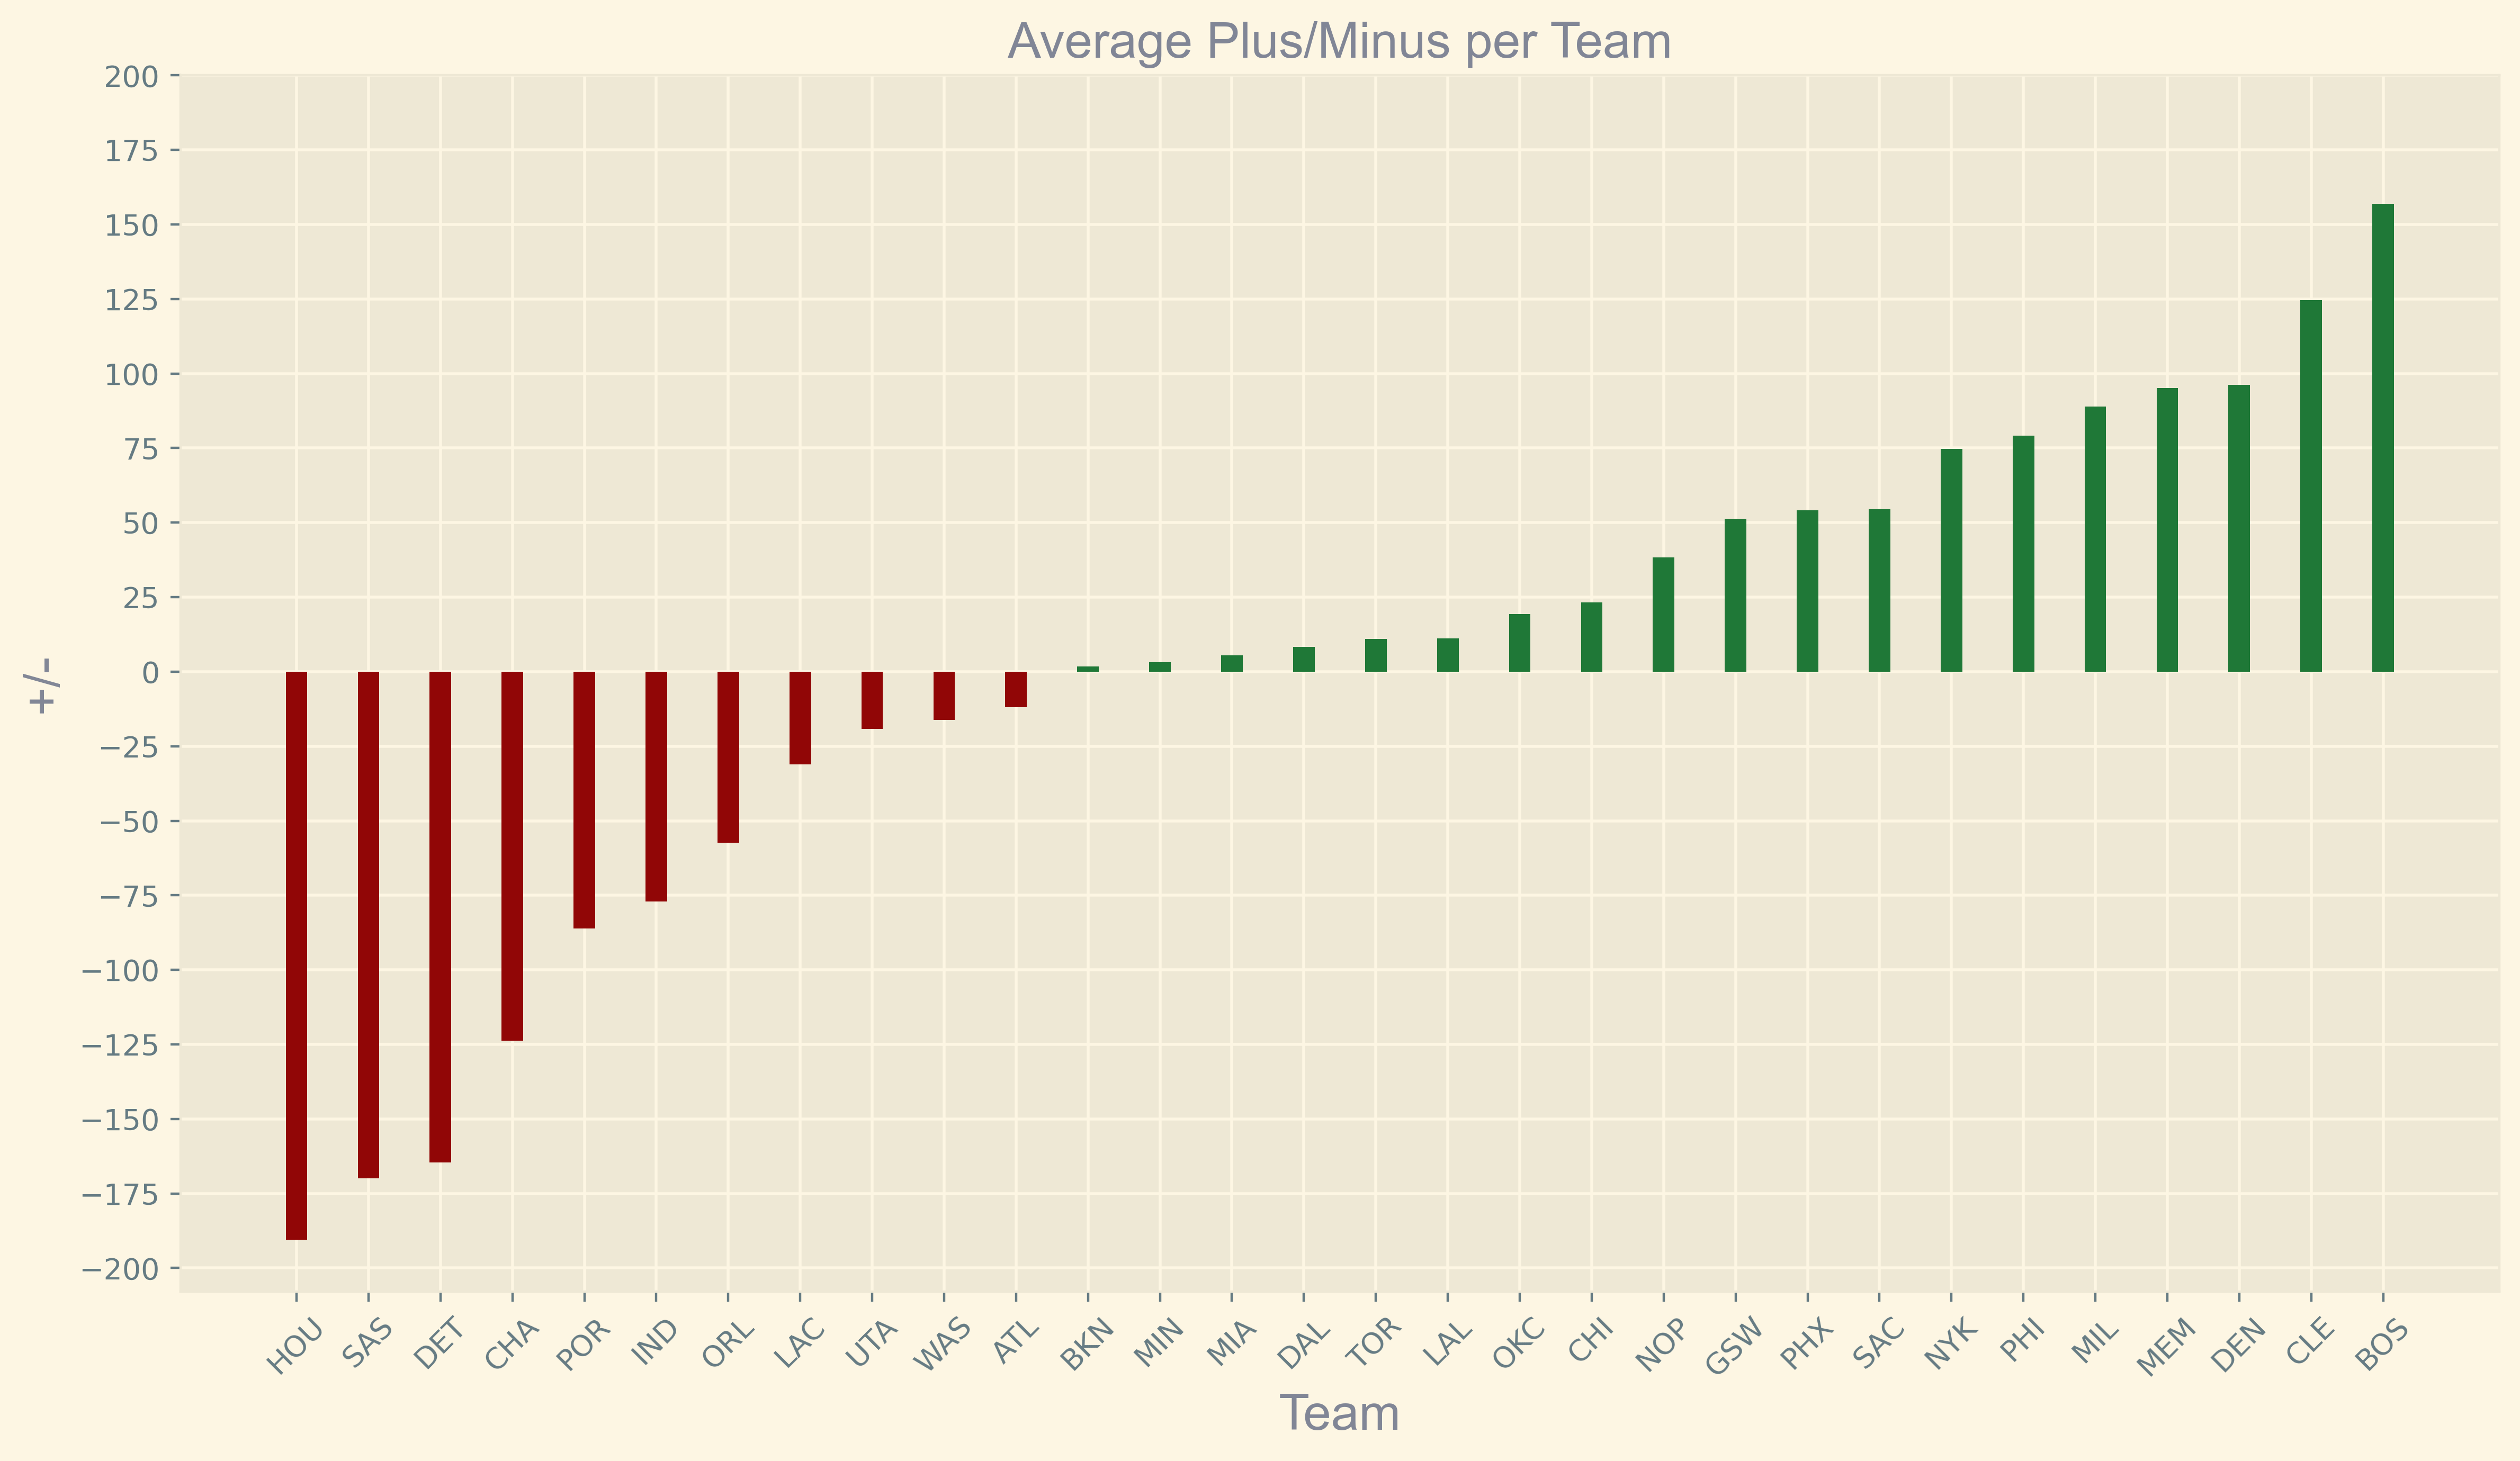

In [51]:
avg_plus_minus = nba.groupby('Team')[ '+/-'].mean().reset_index().sort_values(by='+/-')

colors = ['#910606' if i <= 0 else '#1f7837' for i in list(avg_plus_minus['+/-'])]


plt.figure(figsize=(12, 7), dpi=400)

plt.bar(avg_plus_minus['Team'], 
        avg_plus_minus['+/-'], 
        color=colors,
        width=0.3,
        )


plt.xticks(rotation=45)
plt.yticks(np.arange(-200, 225, 25))
plt.title('Average Plus/Minus per Team', fontdict=font)
plt.xlabel('Team', fontdict=font)
plt.ylabel('+/-', fontdict=font)

plt.tight_layout()
plt.show()

        

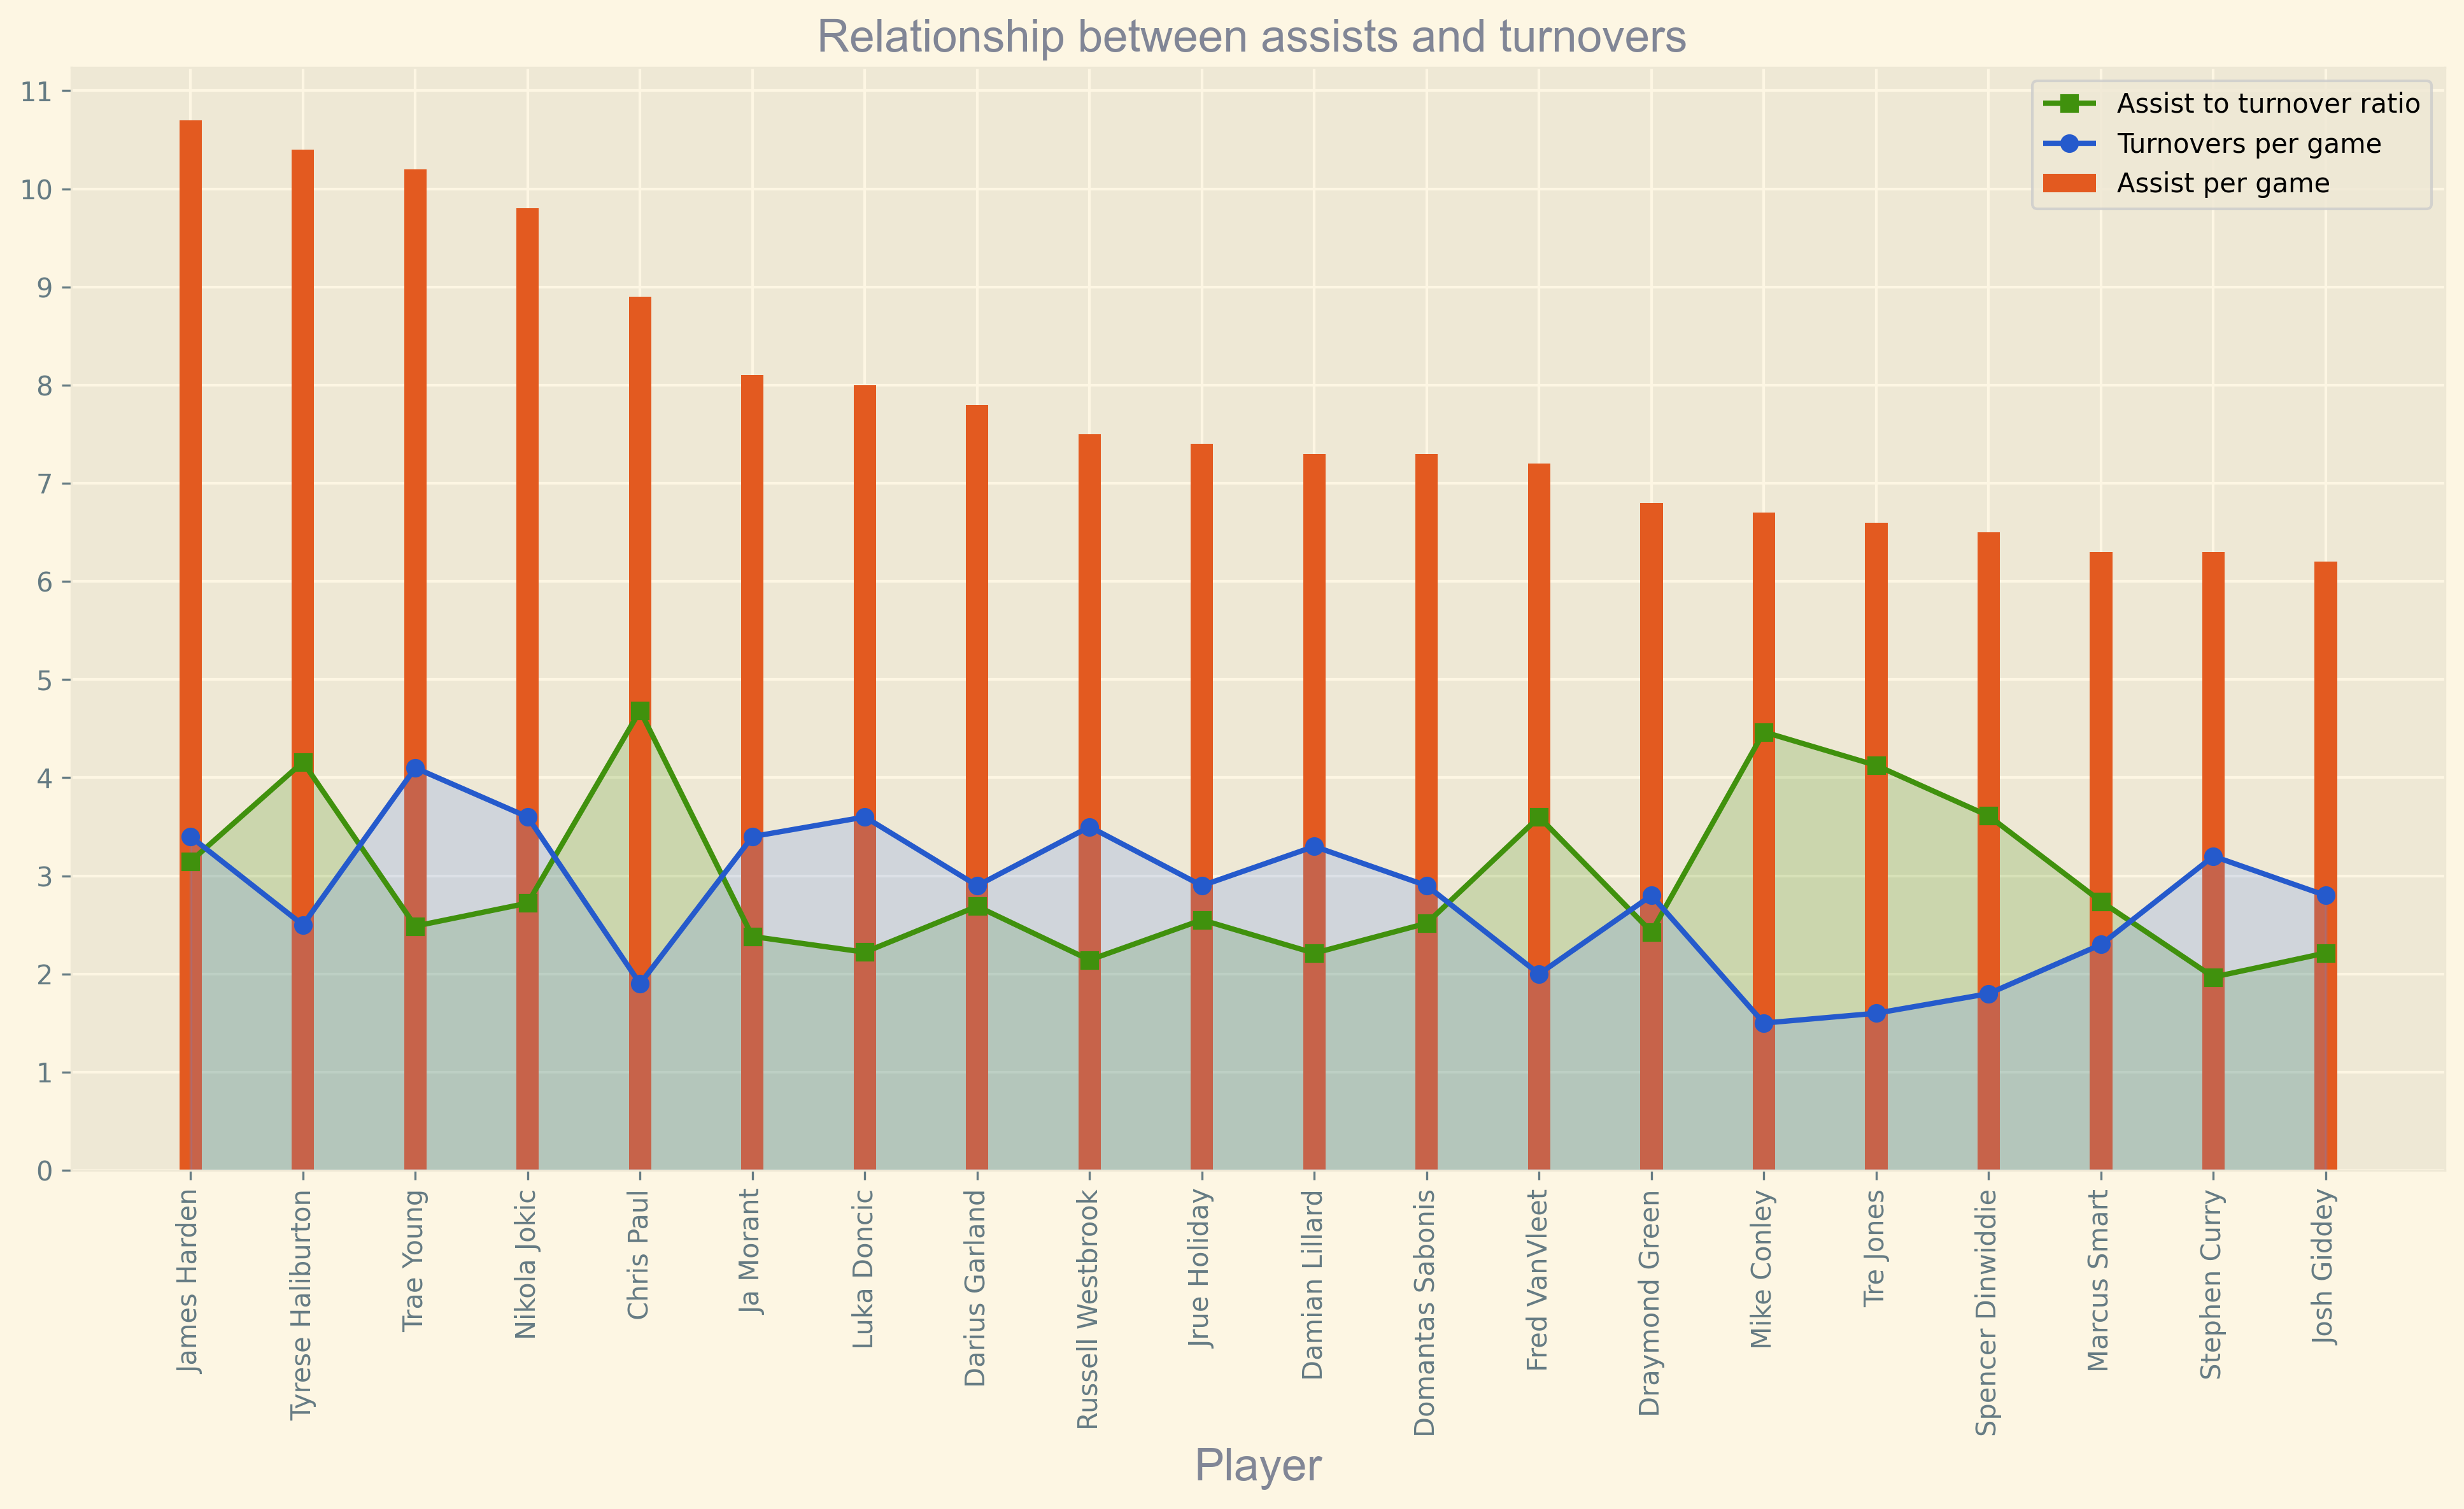

In [55]:
data = nba[nba['GP'] > 55][['APG', 'AST/TOV', 'TPG']].sort_values(by='APG', ascending=False).reset_index().head(20)
data2 = nba[nba['GP'] > 55][['APG', 'AST/TOV', 'TPG']].sort_values(by='APG', ascending=False).reset_index().head(20)
data3 = nba[nba['GP'] > 55][['APG', 'AST/TOV', 'TPG']].sort_values(by='APG', ascending=False).reset_index().head(20)

x = np.arange(0, 20)
width = 0.2

fig , ax = plt.subplots(figsize=(13, 8), dpi=300)

#ax.bar(x=x + width, height=data['AST/TOV'], width=width, label='Assist to turnover ratio', color='#91bd5c')
ax.plot(x, data['AST/TOV'], marker="s", color="#40910d", label="Assist to turnover ratio")
ax.fill_between(x, data['AST/TOV'], color="#40910d", alpha=0.2)

ax.bar(x=x, height=data2['APG'], width=width, label='Assist per game', color='#e35a20')


#ax.bar(x=x - width, height=data3['TPG'], width=width, label="Turnovers per game", color='#3078ba')
ax.plot(x, data3['TPG'], marker="o", color='#255acc', label="Turnovers per game")
ax.fill_between(x, data3['TPG'], color='#588af5', alpha=0.2)



ax.set_title("Relationship between assists and turnovers ", fontdict=font)
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 12))
ax.set_xticklabels(data.Player, rotation=90)

ax.set_xlabel('Player', fontdict=font)
ax.set_ylabel('')

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Kevin Nkansah\AppData\Local\Temp\ipykernel_9896\1477304827.py:24: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax[0].set_ylim(0, 200, 5)
C:\Users\Kevin Nkansah\AppData\Local\Temp\ipykernel_9896\1477304827.py:28: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax[1].set_ylim(0, 200, 5)


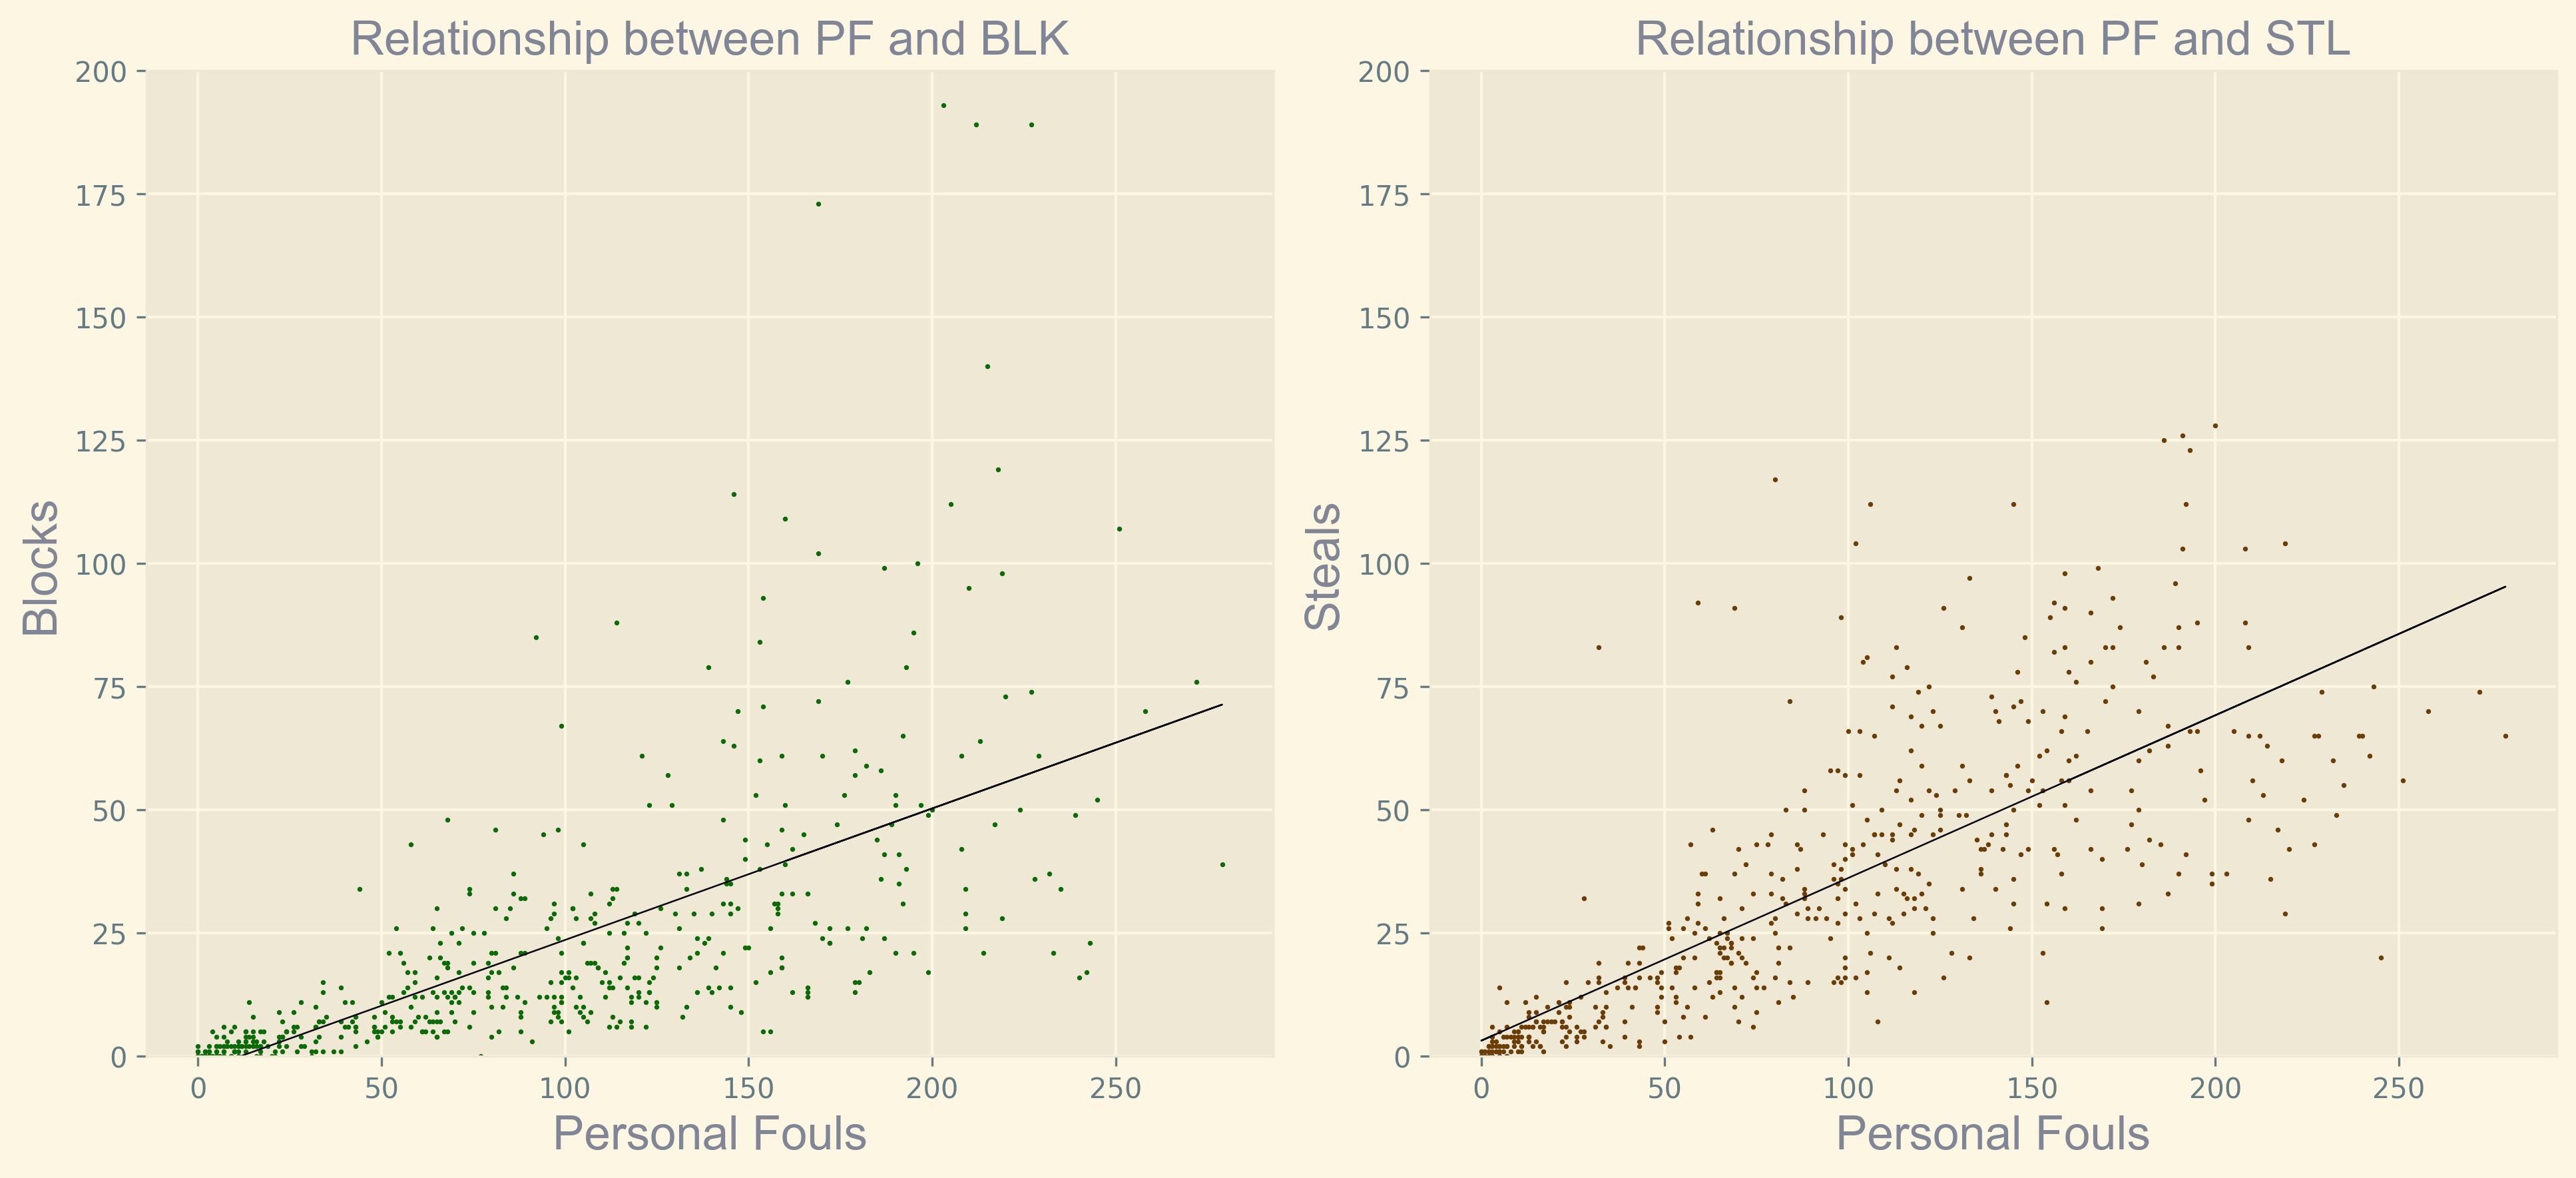

In [44]:
from sklearn.linear_model import LinearRegression  

fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(13,6), dpi=300)

x = nba['PF'] 
y1 = nba['BLK']
y2 = nba['STL']

model1 = LinearRegression()
model1.fit(x.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(x.values.reshape(-1, 1), y2)


ax[0].scatter(x=x, y=y1, s=0.6, color='#0c6b07')
ax[1].scatter(x=x, y=y2, s=0.6, color='#6b3e07')

ax[0].set_title('Relationship between PF and BLK', fontdict=font)
ax[1].set_title('Relationship between PF and STL', fontdict=font)

ax[0].set_xlabel('Personal Fouls', fontdict=font)
ax[0].set_ylabel('Blocks', fontdict=font)
ax[0].set_ylim(0, 200, 5)

ax[1].set_xlabel('Personal Fouls', fontdict=font)
ax[1].set_ylabel('Steals', fontdict=font)
ax[1].set_ylim(0, 200, 5)

ax[0].plot(x, model1.predict(x.values.reshape(-1, 1)), color ='k', linewidth=0.6)
ax[1].plot(x, model2.predict(x.values.reshape(-1, 1)), color='k', linewidth=0.6)

plt.tight_layout()
plt.show()
